## Recurrent Neural Networks (RNNs)

In [15]:
import numpy as np

In [16]:
X = np.array([
    [[0.1, 0.5], [0.2, 0.6], [0.3, 0.7]], 
    [[0.3, 0.7], [0.4, 0.8], [0.5, 0.7]]
])
y = np.array([[0.5], [0.6]])

In [17]:
from keras.models import  Sequential
from keras.layers import SimpleRNN, Dense


LSTM - long-short term memory<br>
GRU - Gated Recurrent Unit

In [18]:
model = Sequential([
    SimpleRNN(10, activation='tanh', input_shape=(3, 2)),
    Dense(1)#, activation='sigmoid')
])
model.compile(optimizer='adam', loss='mse')

c:\Users\rajba\.conda\envs\tech-axis\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
history = model.fit(X, y, epochs=20)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - loss: 0.5490
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step - loss: 0.5020
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 358ms/step - loss: 0.4573
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step - loss: 0.4150
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step - loss: 0.3749
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step - loss: 0.3372
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step - loss: 0.3018
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 645ms/step - loss: 0.2688
Epoch 9/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 633ms/step - loss: 0.2381
Epoch 10/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step - loss: 0.2096
Epoch 11/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - loss: 0.1835
Epoch 12/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step - loss: 0.1595
Epoch 13/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 339ms/step - loss: 0.1376
Epoch 14/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 733ms/step - loss: 0.1178
Epoch 15/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.1001
Epoch 16/20
1/1 ━━━━━━━━━

In [20]:
history.history.keys()

dict_keys(['loss'])

In [21]:
import matplotlib.pyplot as plt

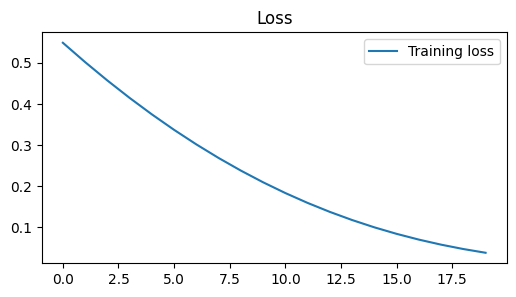

In [22]:
loss = history.history['loss']
plt.figure(figsize=(6, 3))
plt.plot(loss, label='Training loss')
plt.title('Loss')
plt.legend()

In [23]:
model.predict(X)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([[0.7266042],
       [0.6977962]], dtype=float32)